In [1]:
from lineagegrn.plot.analysis_result import *
from lineagegrn.downstream_analysis import *
from lineagegrn.utils.constant import *
from lineagegrn.utils.synthetic_data_generation import *
from lineagegrn.cell_fate_map import *
from lineagegrn.gene_regulatory_network import*
from lineagegrn.utils.metrics import *

## Validate the performance of LineageGRN on C.elegans dataset

In [9]:
target_genes_name=pd.read_csv("examples/data/C.elegans/C.elegans_Full/additional_input_data/target_genes_name.csv").iloc[:,1].to_list()
regulatory_genes_name=pd.read_csv("examples/data/C.elegans/C.elegans_Full/additional_input_data/regulatory_genes_name.csv").iloc[:,1].to_list()

output_path='examples/results/C.elegans/C.elegans_Full/figures/'

tar_num=len(target_genes_name)

In [10]:
base_path = 'examples/data/C.elegans/C.elegans_Full/additional_input_data'

file_names = [
    'ABprp_count_matrix.csv',
    'ABprap_count_matrix.csv',
    'ABara_count_matrix.csv',
    'ABaraap_count_matrix.csv',
    'ABplpa_count_matrix.csv',
    'ABalp_count_matrix.csv',
    'ABala_count_matrix.csv',
    'ABplapp_count_matrix.csv',
    'ABplp_count_matrix.csv',
    'ABarp_count_matrix.csv',
    'ABarpa_count_matrix.csv',
    'ABprpa_count_matrix.csv'
]
count_matrices = {}

for file in file_names:
    key = os.path.splitext(file)[0]
    count_matrices[key] = pd.read_csv(os.path.join(base_path, file), index_col=0)

#### High confidence dataset verification

In [11]:
ABprp_norm_count_matrix=normalize_to_zero_mean(count_matrices['ABprp_count_matrix'])
ABprp_tar=ABprp_norm_count_matrix.iloc[range(tar_num),:]
ABprp_reg=ABprp_norm_count_matrix.iloc[tar_num:,:]

ABprap_norm_count_matrix=normalize_to_zero_mean(count_matrices['ABprap_count_matrix'])
ABprap_tar=ABprap_norm_count_matrix.iloc[range(tar_num),:]
ABprap_reg=ABprap_norm_count_matrix.iloc[tar_num:,:]

ABara_norm_count_matrix=normalize_to_zero_mean(count_matrices['ABara_count_matrix'])
ABara_tar=ABara_norm_count_matrix.iloc[range(tar_num),:]
ABara_reg=ABara_norm_count_matrix.iloc[tar_num:,:]

ABaraap_norm_count_matrix=normalize_to_zero_mean(count_matrices['ABaraap_count_matrix'])
ABaraap_tar=ABaraap_norm_count_matrix.iloc[range(tar_num),:]
ABaraap_reg=ABaraap_norm_count_matrix.iloc[tar_num:,:]

ABplpa_norm_count_matrix=normalize_to_zero_mean(count_matrices['ABplpa_count_matrix'])
ABplpa_tar=ABplpa_norm_count_matrix.iloc[range(tar_num),:]
ABplpa_reg=ABplpa_norm_count_matrix.iloc[tar_num:,:]

ABalp_norm_count_matrix=normalize_to_zero_mean(count_matrices['ABalp_count_matrix'])
ABalp_tar=ABalp_norm_count_matrix.iloc[range(tar_num),:]
ABalp_reg=ABalp_norm_count_matrix.iloc[tar_num:,:]

In [12]:
fate_map_df = pd.read_csv('examples/data/C.elegans/C.elegans_Full/additional_input_data/fate_map_topology.csv')
edges_dict_Celegans = {}
    
for top_key, group in fate_map_df .groupby("Lineage"):
    sub_dict = {f"{row['Parent']}->{row['Child']}": row['Length'] for _, row in group.iterrows()}
    edges_dict_Celegans[top_key] = sub_dict

In [ ]:
edges_ABpr = parse_edge_dict(edges_dict_Celegans['ABpr'])
fate_map_ABpr = FateMap(edges_ABpr)
atac_file_path_ABpr = "examples/data/C.elegans/C.elegans_Full/input_data/ABpr/atac_data.csv"
expression_file_path_ABpr = "examples/data/C.elegans/C.elegans_Full/input_data/ABpr/expression_data.csv"

saved_dir_ABpr = 'examples/results/C.elegans/C.elegans_Full/ABpr'

grn_inference_result = GRNInference(atac_file_path_ABpr, expression_file_path_ABpr, fate_map_ABpr, saved_dir_ABpr)
grn_inference_result.infer_grn(20)

ABpr_grn_dict = get_dynamic_networks(saved_dir_ABpr, fate_map_ABpr, 0, regulatory_genes_name, target_genes_name)

## ABpl
edges_ABpl = parse_edge_dict(edges_dict_Celegans['ABpl'])
fate_map_ABpl = FateMap(edges_ABpl)
atac_file_path_ABpl = "examples/data/C.elegans/C.elegans_Full/input_data/ABpl/atac_data.csv"
expression_file_path_ABpl = "examples/data/C.elegans/C.elegans_Full/input_data/ABpl/expression_data.csv"

saved_dir_ABpl = 'examples/results/C.elegans/C.elegans_Full/ABpl'

grn_inference_result = GRNInference(atac_file_path_ABpl, expression_file_path_ABpl, fate_map_ABpl, saved_dir_ABpl)
grn_inference_result.infer_grn(20)

ABpl_grn_dict = get_dynamic_networks(saved_dir_ABpl, fate_map_ABpl, 0, regulatory_genes_name, target_genes_name)

## ABar
edges_ABar = parse_edge_dict(edges_dict_Celegans['ABar'])
fate_map_ABar = FateMap(edges_ABar)
atac_file_path_ABar = "examples/data/C.elegans/C.elegans_Full/input_data/ABar/atac_data.csv"
expression_file_path_ABar = "examples/data/C.elegans/C.elegans_Full/input_data/ABar/expression_data.csv"

saved_dir_ABar = 'examples/results/C.elegans/C.elegans_Full/ABar'

grn_inference_result = GRNInference(atac_file_path_ABar, expression_file_path_ABar,fate_map_ABar, saved_dir_ABar)
grn_inference_result.infer_grn(20)

ABar_grn_dict = get_dynamic_networks(saved_dir_ABar,fate_map_ABar,0,regulatory_genes_name, target_genes_name)

## ABal
edges_ABal = parse_edge_dict(edges_dict_Celegans['ABal'])
fate_map_ABal= FateMap(edges_ABal)
atac_file_path_ABal = "examples/data/C.elegans/C.elegans_Full/input_data/ABal/atac_data.csv"
expression_file_path_ABal = "examples/data/C.elegans/C.elegans_Full/input_data/ABal/expression_data.csv"

saved_dir_ABal = 'examples/results/C.elegans/C.elegans_Full/ABal'

grn_inference_result = GRNInference(atac_file_path_ABal, expression_file_path_ABal,fate_map_ABal, saved_dir_ABal)
grn_inference_result.infer_grn(20)

ABal_grn_dict = get_dynamic_networks(saved_dir_ABal, fate_map_ABal, 0, regulatory_genes_name, target_genes_name)



In [13]:
## EMS
edges_EMS = parse_edge_dict(edges_dict_Celegans['EMS'])
fate_map_EMS = FateMap(edges_EMS)
atac_file_path_EMS = "examples/data/C.elegans/C.elegans_Full/input_data/EMS/atac_data.csv"
expression_file_path_EMS = "examples/data/C.elegans/C.elegans_Full/input_data/EMS/expression_data.csv"

saved_dir_EMS = 'examples/results/C.elegans/C.elegans_Full/EMS'

grn_inference_result = GRNInference(atac_file_path_EMS, expression_file_path_EMS, fate_map_EMS, saved_dir_EMS)
grn_inference_result.infer_grn(20)

EMS_grn_dict = get_dynamic_networks(saved_dir_EMS, fate_map_EMS, 0, regulatory_genes_name, target_genes_name)

## P2
edges_P2 = parse_edge_dict(edges_dict_Celegans['P2'])
fate_map_P2 = FateMap(edges_P2)
atac_file_path_P2 = "examples/data/C.elegans/C.elegans_Full/input_data/P2/atac_data.csv"
expression_file_path_P2 = "examples/data/C.elegans/C.elegans_Full/input_data/P2/expression_data.csv"

saved_dir_P2 = 'examples/results/C.elegans/C.elegans_Full/P2'

#grn_inference_result = GRNInference(atac_file_path_P2, expression_file_path_P2, fate_map_P2, saved_dir_P2)
#grn_inference_result.infer_grn(20)

P2_grn_dict = get_dynamic_networks(saved_dir_P2, fate_map_P2, 0, regulatory_genes_name, target_genes_name)

-2025-06-28 10:10:25,931-INFO-54880 Serialize node_id MSp- expression data of regulator_gene
-2025-06-28 10:10:27,187-INFO-54880 Serialize node_id MSp- expression data of target_gene
-2025-06-28 10:10:28,944-INFO-54880 Serialize node_id MSa- expression data of regulator_gene
-2025-06-28 10:10:29,966-INFO-54880 Serialize node_id MSa- expression data of target_gene
-2025-06-28 10:10:31,395-INFO-54880 Serialize node_id Ep- expression data of regulator_gene
-2025-06-28 10:10:31,675-INFO-54880 Serialize node_id Ep- expression data of target_gene
-2025-06-28 10:10:32,063-INFO-54880 Serialize node_id Ea- expression data of regulator_gene
-2025-06-28 10:10:32,487-INFO-54880 Serialize node_id Ea- expression data of target_gene
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\

In [16]:
grn_sources = {
    'ABprp': ABpr_grn_dict,
    'ABprap': ABpr_grn_dict,
    'ABara': ABar_grn_dict,
    'ABaraap': ABar_grn_dict,
    'ABplpa': ABpl_grn_dict,
    'ABalp': ABal_grn_dict,
    'ABala': ABal_grn_dict,
    'E': EMS_grn_dict,
    'ABal': ABal_grn_dict,
    'EMS': EMS_grn_dict,
    'MS': EMS_grn_dict,
    'ABarp': ABar_grn_dict,
    'ABar': ABar_grn_dict,
    'ABarpa': ABar_grn_dict,
    'ABaraa': ABar_grn_dict,
    'ABpr': ABpr_grn_dict,
    'ABprpa': ABpr_grn_dict,
    'ABpra': ABpr_grn_dict,
    'ABpl': ABpl_grn_dict,
    'ABplp': ABpl_grn_dict,
    'ABpla': ABpl_grn_dict,
    'ABplapp': ABpl_grn_dict,
    'P2': P2_grn_dict,
    'C': P2_grn_dict
}

grn_arrays = {}

for name, source_dict in grn_sources.items():
    grn = np.array(source_dict[name])
    grn_arrays[name] = grn  
    convert_grn_format(grn, name, regulatory_genes_name, target_genes_name, output_path)


In [17]:
ABprp_inf_tar=pd.DataFrame(grn_arrays['ABprp']@np.array(ABprp_reg))
ABprap_inf_tar=pd.DataFrame(grn_arrays['ABprap']@np.array(ABprap_reg))
ABara_inf_tar=pd.DataFrame(grn_arrays['ABara']@np.array(ABara_reg))
ABaraap_inf_tar=pd.DataFrame(grn_arrays['ABaraap']@np.array(ABaraap_reg))
ABplpa_inf_tar=pd.DataFrame(grn_arrays['ABplpa']@np.array(ABplpa_reg))
ABalp_inf_tar=pd.DataFrame(grn_arrays['ABalp']@np.array(ABalp_reg))
ABprp_inf_tar.index=ABprap_inf_tar.index=ABara_inf_tar.index=ABaraap_inf_tar.index=ABplpa_inf_tar.index=ABalp_inf_tar.index=target_genes_name

In [18]:
ABprp_high_expression_tar_infer=count_greater_than_threshold(ABprp_inf_tar,-count_matrices['ABprp_count_matrix'].values.mean())
ABprp_high_expression_tar=count_greater_than_threshold(ABprp_tar,-count_matrices['ABprp_count_matrix'].values.mean())

ABprap_high_expression_tar_infer=count_greater_than_threshold(ABprap_inf_tar,-count_matrices['ABprap_count_matrix'].values.mean())
ABprap_high_expression_tar=count_greater_than_threshold(ABprap_tar,-count_matrices['ABprap_count_matrix'].values.mean())

ABara_high_expression_tar_infer=count_greater_than_threshold(ABara_inf_tar,-count_matrices['ABara_count_matrix'].values.mean())
ABara_high_expression_tar=count_greater_than_threshold(ABara_tar,-count_matrices['ABara_count_matrix'].values.mean())

ABaraap_high_expression_tar_infer=count_greater_than_threshold(ABaraap_inf_tar,-count_matrices['ABaraap_count_matrix'].values.mean())
ABaraap_high_expression_tar=count_greater_than_threshold(ABaraap_tar,-count_matrices['ABaraap_count_matrix'].values.mean())


ABplpa_high_expression_tar_infer=count_greater_than_threshold(ABplpa_inf_tar,-count_matrices['ABplpa_count_matrix'].values.mean())
ABplpa_high_expression_tar=count_greater_than_threshold(ABplpa_tar,-count_matrices['ABplpa_count_matrix'].values.mean())


ABalp_high_expression_tar_infer = count_greater_than_threshold(ABalp_inf_tar,-count_matrices['ABalp_count_matrix'].values.mean())
ABalp_high_expression_tar = count_greater_than_threshold(ABalp_tar, -count_matrices['ABalp_count_matrix'].values.mean())

In [20]:
data_inf = [ABalp_high_expression_tar_infer, ABplpa_high_expression_tar_infer, ABaraap_high_expression_tar_infer, ABara_high_expression_tar_infer, ABprap_high_expression_tar_infer, ABprp_high_expression_tar_infer]
data_real = [ABalp_high_expression_tar, ABplpa_high_expression_tar, ABaraap_high_expression_tar, ABara_high_expression_tar, ABprap_high_expression_tar, ABprp_high_expression_tar]

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_54880\1537239974.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  D[i, j] = np.sum(inf != real)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_54880\1537239974.py:7: Fut

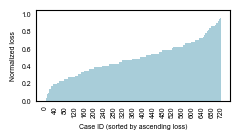

In [28]:
norm_sums, loss_value, norm_value, perm_choice, sorted_perms = match_ExpData(data_inf, data_real, 1, 10000)
identity = tuple(range(len(data_inf)))
identity_idx = sorted_perms.index(identity) 


case_ids = np.arange(1, len(norm_sums) + 1)

plt.figure(figsize=(2.5, 1.5))

plt.bar(case_ids, norm_sums, color='#A8CDD9', width=1.0)

plt.bar(identity_idx + 1,
        norm_sums[identity_idx],
        color='red',
        edgecolor='darkred',
        linewidth=2.5,
        width=1.0)

plt.xlabel("Case ID (sorted by ascending loss)", fontsize=5, fontname='Arial')
plt.ylabel("Normalized loss", fontsize=5, fontname='Arial')
plt.xticks(ticks=np.arange(0, len(norm_sums)+1, 40), fontsize=5, fontname='Arial',rotation=90)
plt.yticks(ticks=np.linspace(0,1,6), fontsize=5, fontname='Arial')
plt.tick_params(axis='x', length=0.2)
plt.tick_params(axis='y', length=0.2)
plt.tight_layout()
plt.savefig(output_path+'matching_result_small.eps', format='eps', bbox_inches='tight')
plt.show()


In [29]:
print("The minimum loss function:", loss_value)
print("The minimum loss function (normalized):", norm_value)
print("The permutation corresponding to the minimum loss function (column index selected for each row, counting starting from 0):", perm_choice)

The minimum loss function: 1205.0
The minimum loss function (normalized): 0.0
The permutation corresponding to the minimum loss function (column index selected for each row, counting starting from 0): (0, 1, 2, 3, 4, 5)


#### Low confidence dataset verification

In [31]:
ABplp_norm_count_matrix = normalize_to_zero_mean(count_matrices['ABplp_count_matrix'])
ABplp_tar = ABplp_norm_count_matrix.iloc[range(tar_num),:]
ABplp_reg = ABplp_norm_count_matrix.iloc[tar_num:,:]

ABplapp_norm_count_matrix = normalize_to_zero_mean(count_matrices['ABplapp_count_matrix'])
ABplapp_tar = ABplapp_norm_count_matrix.iloc[range(tar_num),:]
ABplapp_reg = ABplapp_norm_count_matrix.iloc[tar_num:,:]

ABprpa_norm_count_matrix = normalize_to_zero_mean(count_matrices['ABprpa_count_matrix'])
ABprpa_tar = ABprpa_norm_count_matrix.iloc[range(tar_num),:]
ABprpa_reg = ABprpa_norm_count_matrix.iloc[tar_num:,:]

ABala_norm_count_matrix = normalize_to_zero_mean(count_matrices['ABala_count_matrix'])
ABala_tar = ABala_norm_count_matrix.iloc[range(tar_num),:]
ABala_reg = ABala_norm_count_matrix.iloc[tar_num:,:]

ABarp_norm_count_matrix = normalize_to_zero_mean(count_matrices['ABarp_count_matrix'])
ABarp_tar = ABarp_norm_count_matrix.iloc[range(tar_num),:]
ABarp_reg = ABarp_norm_count_matrix.iloc[tar_num:,:]

ABarpa_norm_count_matrix = normalize_to_zero_mean(count_matrices['ABarpa_count_matrix'])
ABarpa_tar = ABarpa_norm_count_matrix.iloc[range(tar_num),:]
ABarpa_reg = ABarpa_norm_count_matrix.iloc[tar_num:,:]

ABal_norm_count_matrix = normalize_to_zero_mean(pd.concat([count_matrices['ABalp_count_matrix'], count_matrices['ABala_count_matrix']],axis=1))
ABal_tar = ABal_norm_count_matrix.iloc[range(tar_num),:]
ABal_reg = ABal_norm_count_matrix.iloc[tar_num:,:]

ABar_norm_count_matrix = normalize_to_zero_mean(pd.concat([count_matrices['ABarp_count_matrix'], count_matrices['ABara_count_matrix']],axis=1))
ABar_tar = ABar_norm_count_matrix.iloc[range(tar_num),:]
ABar_reg = ABar_norm_count_matrix.iloc[tar_num:,:]

ABaraa_norm_count_matrix = normalize_to_zero_mean(pd.concat([count_matrices['ABara_count_matrix'], count_matrices['ABaraap_count_matrix']],axis=1))
ABaraa_tar = ABaraa_norm_count_matrix.iloc[range(tar_num),:]
ABaraa_reg = ABaraa_norm_count_matrix.iloc[tar_num:,:]

In [32]:
ABplp_inf_tar = pd.DataFrame(grn_arrays['ABplp']@np.array(ABplp_reg))
ABplapp_inf_tar = pd.DataFrame(grn_arrays['ABplapp']@np.array(ABplapp_reg))
ABprpa_inf_tar = pd.DataFrame(grn_arrays['ABprpa']@np.array(ABprpa_reg))
ABala_inf_tar = pd.DataFrame(grn_arrays['ABala']@np.array(ABala_reg))
ABarp_inf_tar = pd.DataFrame(grn_arrays['ABarp']@np.array(ABarp_reg))
ABarpa_inf_tar = pd.DataFrame(grn_arrays['ABarpa']@np.array(ABarpa_reg))
ABal_inf_tar = pd.DataFrame(grn_arrays['ABal']@np.array(ABal_reg))
ABar_inf_tar = pd.DataFrame(grn_arrays['ABar']@np.array(ABar_reg))
ABaraa_inf_tar = pd.DataFrame(grn_arrays['ABaraa']@np.array(ABaraa_reg))
ABplp_inf_tar.index = ABplapp_inf_tar.index = ABprpa_inf_tar.index = ABala_inf_tar.index = ABarp_inf_tar.index = ABarpa_inf_tar.index = ABal_inf_tar.index = ABar_inf_tar.index = ABaraa_inf_tar.index = target_genes_name

In [33]:
ABplp_high_expression_tar_infer = count_greater_than_threshold(ABplp_inf_tar, -count_matrices['ABplp_count_matrix'].values.mean())
ABplp_high_expression_tar = count_greater_than_threshold(ABplp_tar, -count_matrices['ABplp_count_matrix'].values.mean())

ABplapp_high_expression_tar_infer = count_greater_than_threshold(ABplapp_inf_tar, -count_matrices['ABplapp_count_matrix'].values.mean())
ABplapp_high_expression_tar = count_greater_than_threshold(ABplapp_tar, -count_matrices['ABplapp_count_matrix'].values.mean())

ABprpa_high_expression_tar_infer = count_greater_than_threshold(ABprpa_inf_tar, -count_matrices['ABprpa_count_matrix'].values.mean())
ABprpa_high_expression_tar = count_greater_than_threshold(ABprpa_tar, -count_matrices['ABprpa_count_matrix'].values.mean())

ABala_high_expression_tar_infer = count_greater_than_threshold(ABala_inf_tar, -count_matrices['ABala_count_matrix'].values.mean())
ABala_high_expression_tar = count_greater_than_threshold(ABala_tar, -count_matrices['ABala_count_matrix'].values.mean())

ABarp_high_expression_tar_infer = count_greater_than_threshold(ABarp_inf_tar, -count_matrices['ABarp_count_matrix'].values.mean())
ABarp_high_expression_tar = count_greater_than_threshold(ABarp_tar, -count_matrices['ABarp_count_matrix'].values.mean())

ABarpa_high_expression_tar_infer = count_greater_than_threshold(ABarpa_inf_tar, -count_matrices['ABarpa_count_matrix'].values.mean())
ABarpa_high_expression_tar = count_greater_than_threshold(ABarpa_tar, -count_matrices['ABarpa_count_matrix'].values.mean())

ABal_high_expression_tar_infer = count_greater_than_threshold(ABal_inf_tar, -pd.concat([count_matrices['ABalp_count_matrix'], count_matrices['ABala_count_matrix']],axis=1).values.mean())
ABal_high_expression_tar = count_greater_than_threshold(ABal_tar, -pd.concat([count_matrices['ABalp_count_matrix'], count_matrices['ABala_count_matrix']],axis=1).values.mean())

ABar_high_expression_tar_infer = count_greater_than_threshold(ABar_inf_tar, -pd.concat([count_matrices['ABarp_count_matrix'], count_matrices['ABara_count_matrix']],axis=1).values.mean())
ABar_high_expression_tar = count_greater_than_threshold(ABar_tar, -pd.concat([count_matrices['ABarp_count_matrix'], count_matrices['ABara_count_matrix']],axis=1).values.mean())

ABaraa_high_expression_tar_infer = count_greater_than_threshold(ABaraa_inf_tar, -pd.concat([count_matrices['ABara_count_matrix'], count_matrices['ABaraap_count_matrix']],axis=1).values.mean())
ABaraa_high_expression_tar = count_greater_than_threshold(ABaraa_tar, -pd.concat([count_matrices['ABara_count_matrix'], count_matrices['ABaraap_count_matrix']],axis=1).values.mean())

In [35]:
data_inf = [ABalp_high_expression_tar_infer, ABplpa_high_expression_tar_infer, ABaraap_high_expression_tar_infer, ABara_high_expression_tar_infer, ABprap_high_expression_tar_infer, ABprp_high_expression_tar_infer,
           ABplp_high_expression_tar_infer, ABplapp_high_expression_tar_infer, ABprpa_high_expression_tar_infer, ABala_high_expression_tar_infer, ABarp_high_expression_tar_infer, ABarpa_high_expression_tar_infer,
           ABal_high_expression_tar_infer, ABar_high_expression_tar_infer, ABaraa_high_expression_tar_infer]
data_real = [ABalp_high_expression_tar, ABplpa_high_expression_tar, ABaraap_high_expression_tar, ABara_high_expression_tar, ABprap_high_expression_tar, ABprp_high_expression_tar,
            ABplp_high_expression_tar, ABplapp_high_expression_tar, ABprpa_high_expression_tar, ABala_high_expression_tar, ABarp_high_expression_tar, ABarpa_high_expression_tar,
            ABal_high_expression_tar, ABar_high_expression_tar, ABaraa_high_expression_tar]

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_54880\1537239974.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  D[i, j] = np.sum(inf != real)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_54880\1537239974.py:7: Fut

The p value is: 0.0347


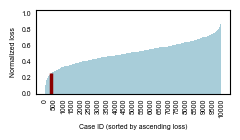

In [40]:
norm_sums, loss_value, norm_value, perm_choice, sorted_perms = match_ExpData(data_inf, data_real, 1, 10000)
p_value = [i/10000 for i in range(0,10000) if sorted_perms[i]==tuple(range(0,15))]
print("The p value is:", p_value[0])

identity = tuple(range(len(data_inf)))
identity_idx = sorted_perms.index(identity) 


case_ids = np.arange(1, len(norm_sums) + 1)

plt.figure(figsize=(2.5, 1.5))

plt.bar(case_ids, norm_sums, color='#A8CDD9', width=1.0)

plt.bar(identity_idx + 1,
        norm_sums[identity_idx],
        color='red',
        edgecolor='darkred',
        linewidth=2.5,
        width=1.0)

plt.xlabel("Case ID (sorted by ascending loss)", fontsize=5, fontname='Arial')
plt.ylabel("Normalized loss", fontsize=5, fontname='Arial')
plt.xticks(ticks=np.arange(0, len(norm_sums)+1, 500), fontsize=5, fontname='Arial',rotation=90)
plt.yticks(ticks=np.linspace(0,1,6), fontsize=5, fontname='Arial')
plt.tick_params(axis='x', length=0.2)
plt.tick_params(axis='y', length=0.2)
plt.tight_layout()
plt.savefig(output_path+'matching_result_small.eps', format='eps', bbox_inches='tight')
plt.show()


## Data analysis on C.elegans dataset

### Revealing the reconfiguration pattern of inferred GRNs along cell lineages

In [42]:
atac_file_path = "examples/data/C.elegans/C.elegans_Full/input_data/EMS/atac_data.csv"
expression_file_path = "examples/data/C.elegans/C.elegans_Full/input_data/EMS/expression_data.csv"
fate_map_path ='examples/data/C.elegans/C.elegans_Full/input_data/EMS/edge_dict_EMS.csv'

saved_dir = 'examples/results/C.elegans/C.elegans_Full/EMS'

edge_dict = load_fate_map_topology(fate_map_path)
edge = parse_edge_dict(edge_dict)
fate_map = FateMap(edge)

regulator_names = list(pd.read_csv('examples/data/C.elegans/C.elegans_Full/additional_input_data/regulatory_genes_name.csv',index_col=0).iloc[:,0])
target_gene_names = list(pd.read_csv('examples/data/C.elegans/C.elegans_Full/additional_input_data/target_genes_name.csv',index_col=0).iloc[:,0])

dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.1, regulator_names, target_gene_names)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

In [43]:
output_path = 'examples/results/C.elegans/C.elegans_Full/figures/'
path = list(fate_map.nodes.keys())

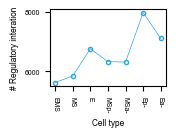

In [44]:
plot_regulatory_interactions_along_fatemap(dynamic_networks_dict, path, output_path)

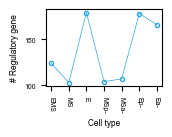

In [45]:
plot_dynamic_regulator_number(saved_dir, regulator_names,'elt-7', path, 0.05, output_path)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})


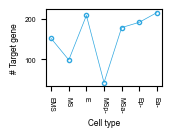

In [46]:
plot_regulatory_genes_along_fatemap(saved_dir, regulator_names, 'elt-7', path, 0.05, output_path)

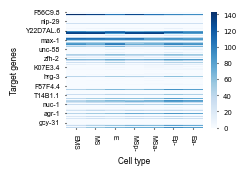

In [47]:
plot_target_genes_along_fatemap(target_gene_names, regulator_names, 'negative', saved_dir, path, 0.1, output_path)

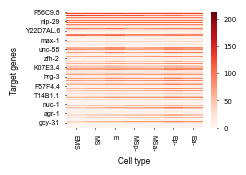

In [48]:
plot_target_genes_along_fatemap(target_gene_names, regulator_names,'positive', saved_dir, path, 0.1, output_path)

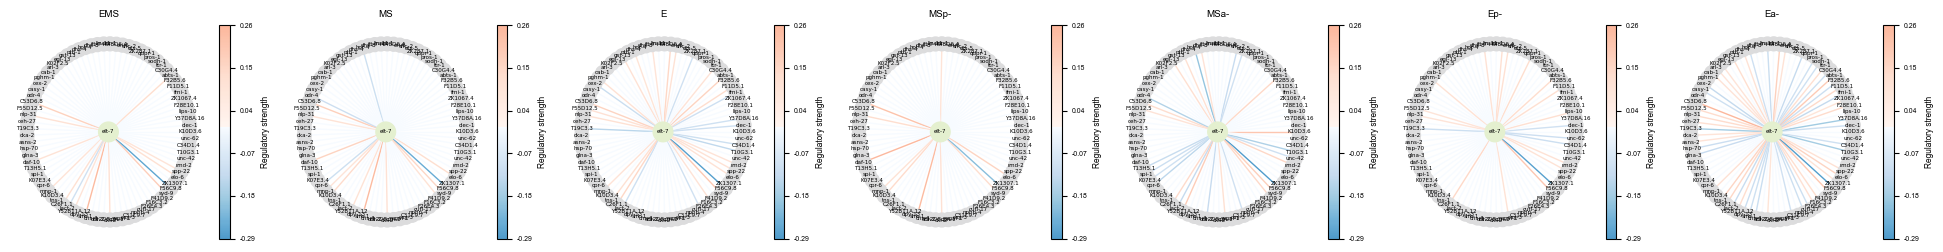

In [49]:
plot_regulatory_network_along_fatemap('elt-7', dynamic_networks_dict, path, output_path, 0.1, figsize=(19.5,2.5))

### Identifying regulatory genes key for cell differentiation

In [52]:
groups = {
    'ABar': {
        'names': ['ABarpp-', 'ABarap-', 'ABarpapp-', 'ABarpapa-', 'ABaraaa-', 'ABaraapp-', 'ABaraapaa-'],
        'extra_keys': ['ABarp','ABarpa','ABara','ABaraa','ABaraap','ABar']
    },
    'ABpr': {
        'names': ['ABprppa-','ABprpap-','ABprpaa-','ABpraa-','ABprappa-','ABprapa-'],
        'extra_keys': ['ABprp','ABprpa','ABprapp','ABpra','ABpr','ABprap']
    },
    'ABpl': {
        'names': ['ABplpppp-','ABplpap-','ABplpaa-','ABplapap-','ABplappp-','ABplappa-'],
        'extra_keys': ['ABplp','ABplpa','ABpla','ABplapp','ABpl']
    },
    'ABal': {
        'names': ['ABalpp-','ABalpa-','ABalap-','ABalaa-'],
        'extra_keys': ['ABalp','ABala','ABal']
    },
    'EMS': {
        'names': ['MSa-','MSp-','Ea-','Ep-'],
        'extra_keys': ['MS','E','EMS']
    },
    'P2': {
        'names': ['D-','hyp','body_muscle'],
        'extra_keys': ['P2','C']
    }
}

base_path = 'examples/data/C.elegans/C.elegans_Full/additional_input_data'
gene_expression_matrices = {}
high_expression_genes = {}

for group, info in groups.items():
    group_dict = {}
    for name in info['names']:
        file_path = f'{base_path}/{name}_count_matrix.csv'
        df = pd.read_csv(file_path, index_col=0)
        gene_expression_matrices[name] = df
        genes_var_name = name
        group_dict[genes_var_name] = [i for i in get_high_expression_genes(df) if i in target_genes_name]

    for key in info['extra_keys']:
        group_dict[key] = None
        
    high_expression_genes[group] = group_dict


In [79]:
key_regulators_df_concat = pd.DataFrame()
for lineage in edges_dict_Celegans.keys():
    edges = parse_edge_dict(edges_dict_Celegans[lineage])
    fatemap = FateMap(edges,high_expression_genes[lineage])
    nodes = fatemap.node_internals[::-1]+[fatemap.node_root]
    for node in nodes:
        input_path = os.path.join('examples/results/C.elegans/C.elegans_Full', lineage)
        key_regulators = identify_key_genes_differentiation(input_path, fatemap, 0, regulatory_genes_name, target_genes_name, node)
        high_expression_genes_of_ancestor_node = list(set(key_regulators.loc[((key_regulators['DRS']>0.05) & (key_regulators['DRC']>0.5)), 'regulator_id']) & set(target_genes_name))
        high_expression_genes[lineage][node] = high_expression_genes_of_ancestor_node
        fatemap = FateMap(edges,high_expression_genes[lineage])
        key_regulators_df_concat = pd.concat([key_regulators_df_concat,key_regulators])

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\plot\analysis_result.py:608: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, color='black', fontsize=5, fontname='Arial', va='center')
-2025-06-28 21:21:46,434-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


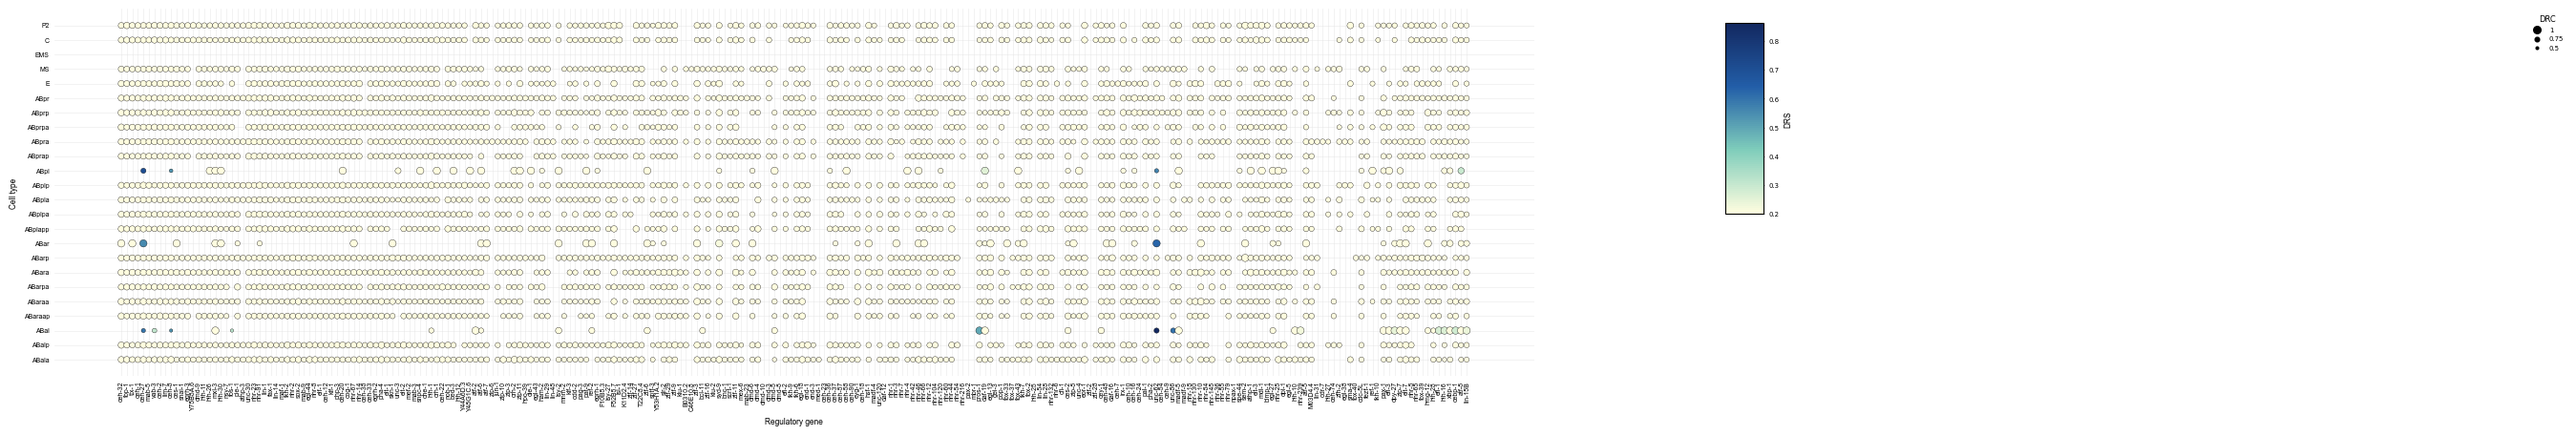

<Axes: xlabel='Regulatory gene', ylabel='Cell type'>

In [58]:
nodes = list(key_regulators_df_concat['node_id'].drop_duplicates())
plot_key_genes_differentiation(key_regulators_df_concat.fillna(0), nodes, regulatory_genes_name, output_path, figsize=(20,5))

### Identifying regulatory genes key for cell fate decision

##### P2

In [59]:
edges = parse_edge_dict(edges_dict_Celegans['P2'])
fate_map= FateMap(edges, high_expression_genes['P2'])
input_path = 'examples/results/C.elegans/C.elegans_Full/P2'
grn_dict_P2 = get_dynamic_networks(input_path, fate_map, 0.1, regulatory_genes_name, target_genes_name)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

['hyp', 'body_muscle']
(186, 5)


-2025-06-28 21:22:51,606-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


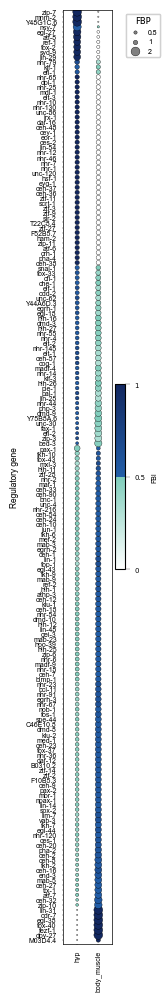

In [60]:
ancestor_node_id = 'C'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_C = identify_key_genes_fate_bias(grn_dict_P2, 'C', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_C, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)

plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

##### EMS

In [61]:
edges = parse_edge_dict(edges_dict_Celegans['EMS'])
fate_map = FateMap(edges,high_expression_genes['EMS'])
input_path = 'examples/results/C.elegans/C.elegans_Full/EMS'
grn_dict_EMS = get_dynamic_networks(input_path, fate_map, 0.1, regulatory_genes_name, target_genes_name)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

['MSp-', 'MSa-']
(129, 5)


-2025-06-28 21:23:31,988-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


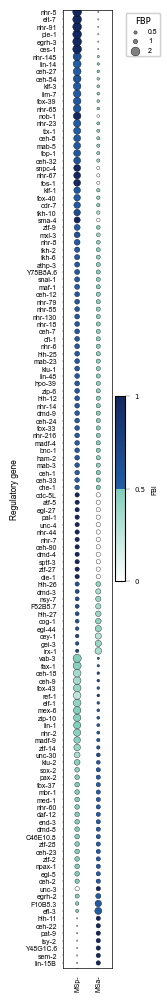

In [62]:
ancestor_node_id = 'MS'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_MS = identify_key_genes_fate_bias(grn_dict_EMS, 'MS', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_MS, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)
plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

['Ep-', 'Ea-']
(210, 5)


-2025-06-28 21:23:33,049-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


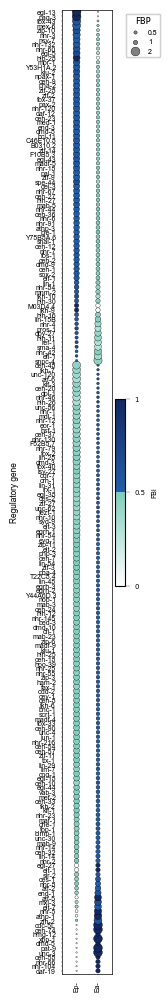

In [63]:
ancestor_node_id = 'E'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_E = identify_key_genes_fate_bias(grn_dict_EMS, 'E', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_E, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)

plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

##### ABpr

In [64]:
edges = parse_edge_dict(edges_dict_Celegans['ABpr'])
fate_map = FateMap(edges,high_expression_genes['ABpr'])
input_path ='examples/results/C.elegans/C.elegans_Full/ABpr'
grn_dict_ABpr = get_dynamic_networks(input_path, fate_map, 0.1, regulatory_genes_name, target_genes_name)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

['ABprpap-', 'ABprpaa-']
(143, 5)


-2025-06-28 21:25:02,920-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


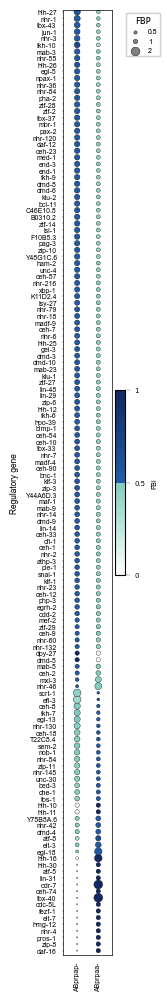

In [65]:
ancestor_node_id = 'ABprpa'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_ABprpa = identify_key_genes_fate_bias(grn_dict_ABpr, 'ABprpa', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_ABprpa, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)

plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

['ABprappa-', 'ABprapa-']
(202, 5)


-2025-06-28 21:25:09,650-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


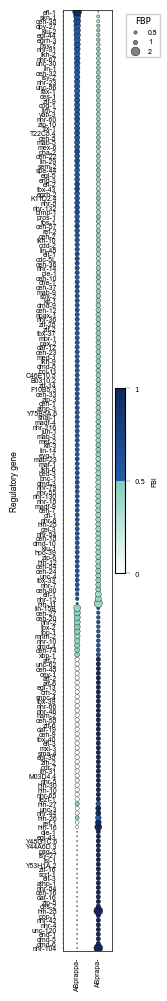

In [66]:
ancestor_node_id = 'ABprap'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_ABprpa = identify_key_genes_fate_bias(grn_dict_ABpr, 'ABprap', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_ABprpa, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)

plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

##### ABpl

In [67]:
edges = parse_edge_dict(edges_dict_Celegans['ABpl'])
fate_map = FateMap(edges,high_expression_genes['ABpl'])
input_path = 'examples/results/C.elegans/C.elegans_Full/ABpl'
grn_dict_ABpl = get_dynamic_networks(input_path, fate_map, 0.1, regulatory_genes_name, target_genes_name)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

['ABplpap-', 'ABplpaa-']
(179, 5)


-2025-06-28 21:27:55,055-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


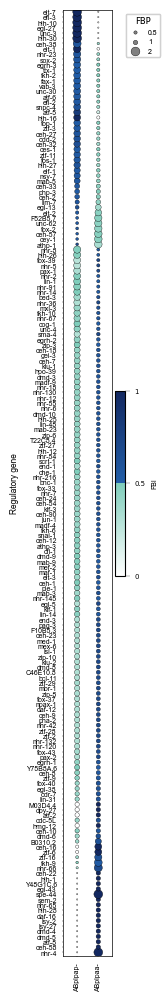

In [68]:
ancestor_node_id = 'ABplpa'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_ABplpa = identify_key_genes_fate_bias(grn_dict_ABpl, 'ABplpa', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_ABplpa, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)
plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

['ABplappp-', 'ABplappa-']
(228, 5)


-2025-06-28 21:27:56,050-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


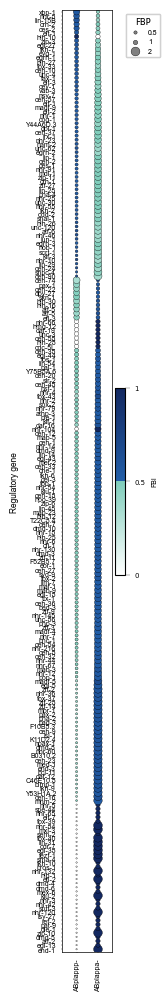

In [69]:
ancestor_node_id = 'ABplapp'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))


key_regulators_df_ABplapp = identify_key_genes_fate_bias(grn_dict_ABpl, 'ABplapp', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_ABplapp, child_nodes)
df_filter = filter_regulatory_genes(df,regulatory_genes_name)
plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

##### ABal

In [70]:
edges = parse_edge_dict(edges_dict_Celegans['ABal'])
fate_map = FateMap(edges, high_expression_genes['ABal'])
input_path = 'examples/results/C.elegans/C.elegans_Full/ABal'
grn_dict_ABal = get_dynamic_networks(input_path, fate_map, 0.1, regulatory_genes_name, target_genes_name)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

['ABalpp-', 'ABalpa-']
(113, 5)


-2025-06-28 21:28:15,582-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


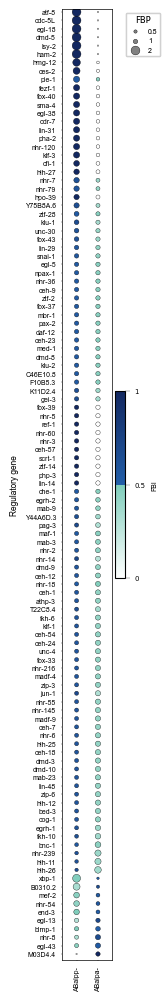

In [71]:
ancestor_node_id = 'ABalp'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_ABalp = identify_key_genes_fate_bias(grn_dict_ABal, 'ABalp', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_ABalp, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)
plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

['ABalap-', 'ABalaa-']
(114, 5)


-2025-06-28 21:28:16,254-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


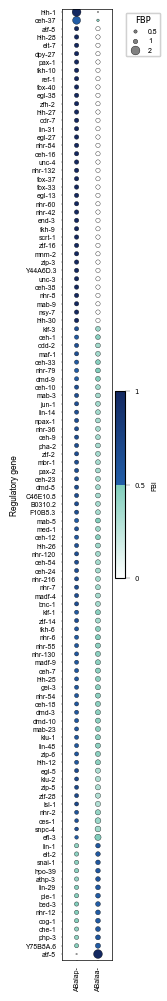

In [72]:
ancestor_node_id = 'ABala'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf

Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_ABalp = identify_key_genes_fate_bias(grn_dict_ABal, 'ABala', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_ABalp, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)
plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

##### ABar

In [73]:
edges = parse_edge_dict(edges_dict_Celegans['ABar'])
fate_map = FateMap(edges,high_expression_genes['ABar'])
input_path = 'examples/results/C.elegans/C.elegans_Full/ABar'
grn_dict_ABar = get_dynamic_networks(input_path,fate_map, 0.1, regulatory_genes_name, target_genes_name)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

['ABarpapa-', 'ABarpapp-']
(183, 5)


-2025-06-28 21:29:04,174-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


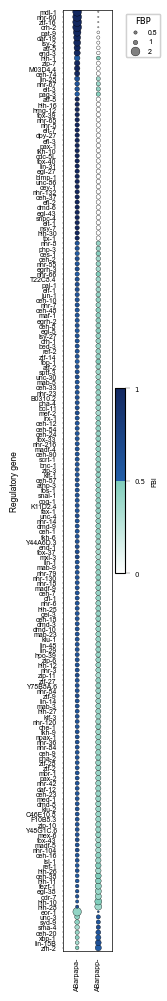

In [74]:
ancestor_node_id = 'ABarpa'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_ABalp = identify_key_genes_fate_bias(grn_dict_ABar, 'ABarpa', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_ABalp, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)
plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

['ABaraapp-', 'ABaraapaa-']
(182, 5)


-2025-06-28 21:29:05,068-WARNING-54880 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


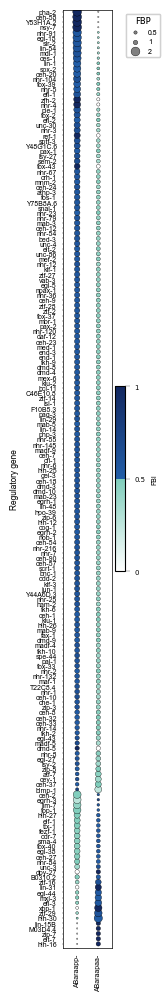

In [75]:
ancestor_node_id = 'ABaraap'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_genes_name) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))

key_regulators_df_ABalp = identify_key_genes_fate_bias(grn_dict_ABar,'ABaraap', Tar_1, Tar_2, regulatory_genes_name)

df = merge_key_regulators(key_regulators_df_ABalp, child_nodes)
df_filter = filter_regulatory_genes(df, regulatory_genes_name)
plot_key_genes_fate_bias(df_filter, child_nodes, output_path, figsize=(1.65,10))

### Identifying constitutive and specific regulatory interactions

In [76]:
saved_dir_EMS = 'examples/results/C.elegans/C.elegans_Full/EMS'
edges_EMS = parse_edge_dict(edges_dict_Celegans['EMS'])
fate_map_EMS = FateMap(edges_EMS)
X, centers, weight_matrix_raw=cluster_regulatory_interactions(saved_dir_EMS, fate_map_EMS, 0.3, regulatory_genes_name, target_genes_name, len(regulatory_genes_name),len(target_genes_name), 5, 2)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

In [77]:
edges_cluster_to_nodes = identify_regulatory_interactions_specificity(saved_dir_EMS, fate_map_EMS, 0.1, regulatory_genes_name, target_genes_name, 5, 0.3, X, len(regulatory_genes_name), len(target_genes_name),weight_matrix_raw)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

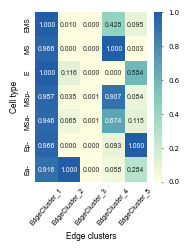

In [78]:
plot_regulatory_interactions_in_celltypes(edges_cluster_to_nodes, output_path)